In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt

In [2]:
G = nx.erdos_renyi_graph(20, 0.12)
for edge in G.edges():
    G.edges[edge]['weight'] = random.randint(3, 10)

source_node = random.choice(list(G.nodes))
infected_nodes = set([source_node])

In [3]:
def weighted_spread(G, infected_nodes):
    new_infected = set()
    for node in infected_nodes:
        neighbors = list(G.neighbors(node))
        for neighbor in neighbors:
            if neighbor not in infected_nodes:
                edge_weight = G.edges[node, neighbor]['weight']
                if edge_weight >= 7:
                    new_infected.add(neighbor)
    return new_infected

steps = 6

Step 1: 3 nodes infected


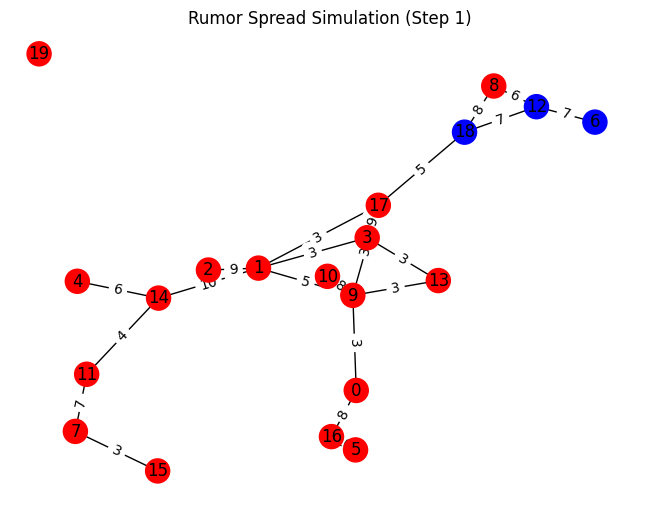

Step 2: 4 nodes infected


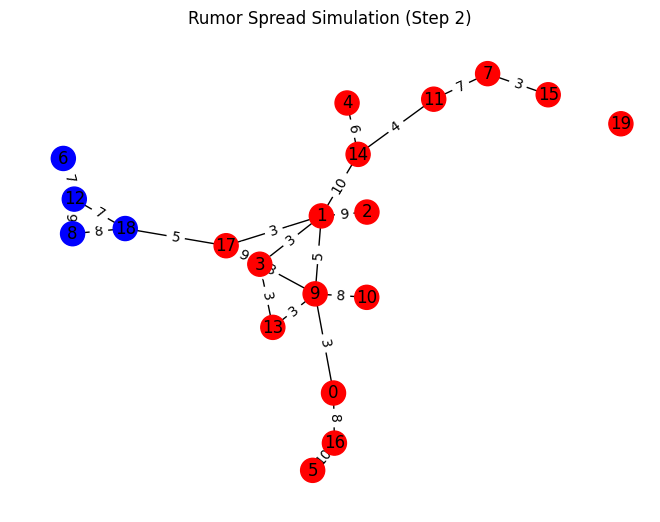

Step 3: 4 nodes infected


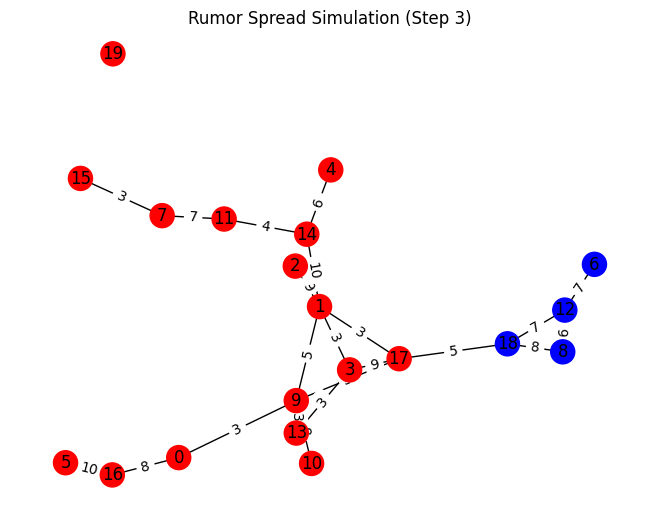

Step 4: 4 nodes infected


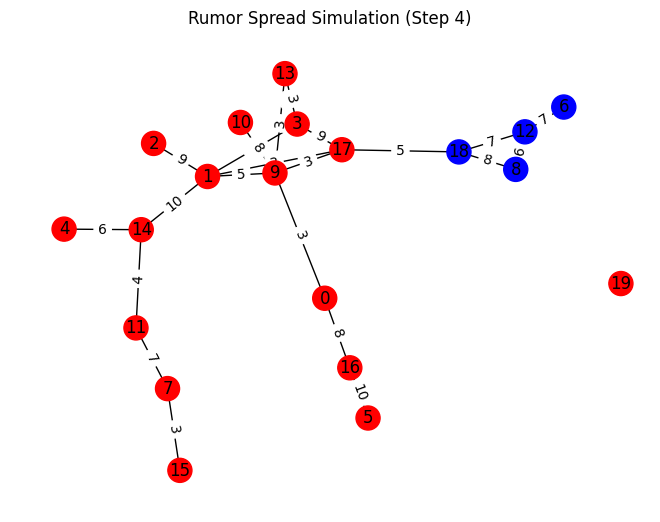

Step 5: 4 nodes infected


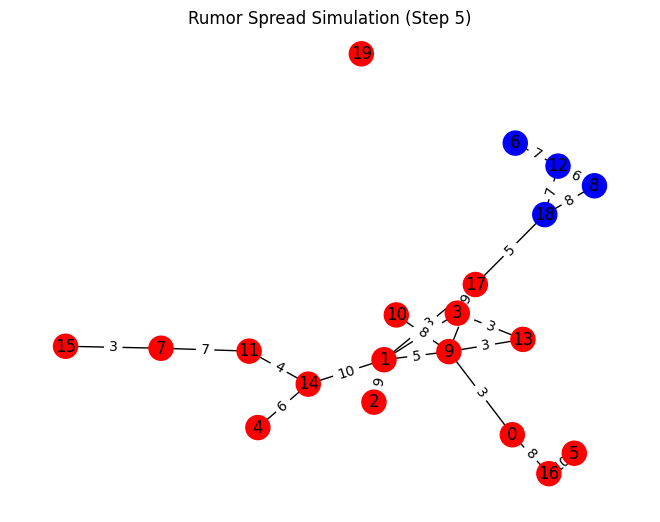

Step 6: 4 nodes infected


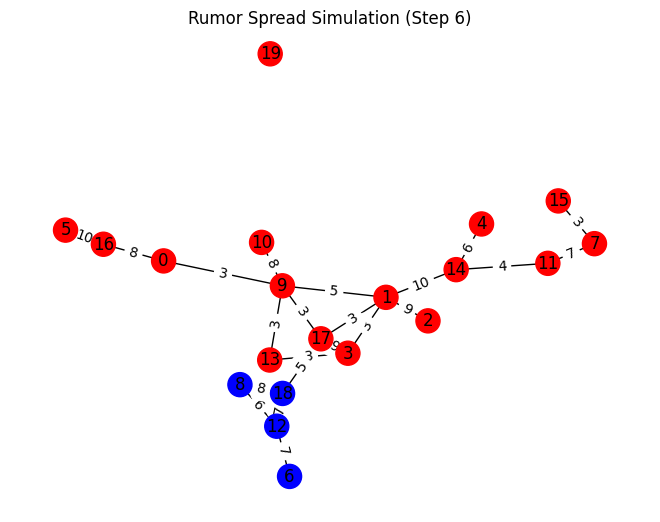

In [4]:
plt.ion()

for step in range(steps):
    plt.clf() 
    new_infected = weighted_spread(G, infected_nodes)
    infected_nodes.update(new_infected)
    print(f"Step {step+1}: {len(infected_nodes)} nodes infected")

    pos = nx.spring_layout(G, k=0.68)
    nx.draw(G, pos, node_color=['blue' if node in infected_nodes else 'red' for node in G.nodes()], with_labels=True)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title(f"Rumor Spread Simulation (Step {step+1})")
    plt.draw()
    plt.pause(0.9)  

plt.ioff()  
plt.show()